<a href="https://colab.research.google.com/github/phibrainDK/tesis/blob/master/CodeCT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Populating the interactive namespace from numpy and matplotlib
0       H 
2      Li 
5       C 
6       N 
7       O 
8       F 
10     Na 
11     Mg 
13     Si 
14      P 
15      S 
16     Cl 
18      K 
27     Ni 
28     Cu 
29     Zn 
30     Ga 
32     As 
33     Se 
34     Br 
45     Pd 
46     Ag 
47     Cd 
48     In 
49     Sn 
51     Te 
52      I 
77     Pt 
78     Au 
79     Hg 
80     Tl 
81     Pb 
Name:  symbol, dtype: object
         PC1       PC2
0  -3.145602  1.490375
1   1.837240  1.108022
2  -1.558159 -0.091893
3  -2.787669 -0.283672
4  -2.986095 -0.434971
5  -4.207889 -0.987836
6   2.915114 -0.143478
7   0.969276  0.948086
8   0.662556 -0.553946
9  -0.513742 -0.093235
10 -0.843453 -0.376485
11 -1.884115 -0.868921
12  4.554301 -1.433234
13  0.233738  0.786692
14  0.172626  1.406175
15 -0.089724  1.516270
16  1.051665  0.297855
17 -0.087531 -0.200669
18 -0.324399 -0.616299
19 -1.121704 -0.939820
20  0.057783  0.493750
21  0.900053  0.462797
22  0.518887  0.946616
23  

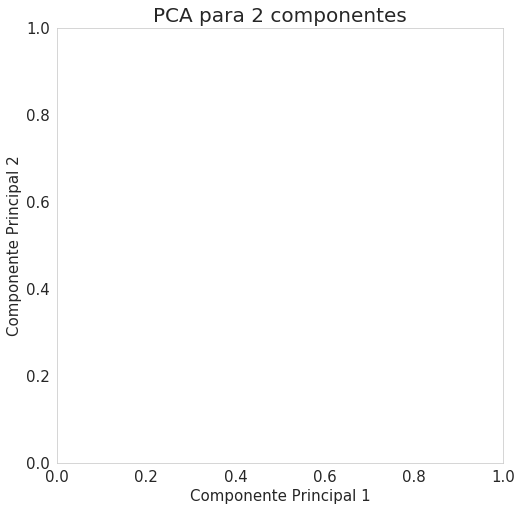

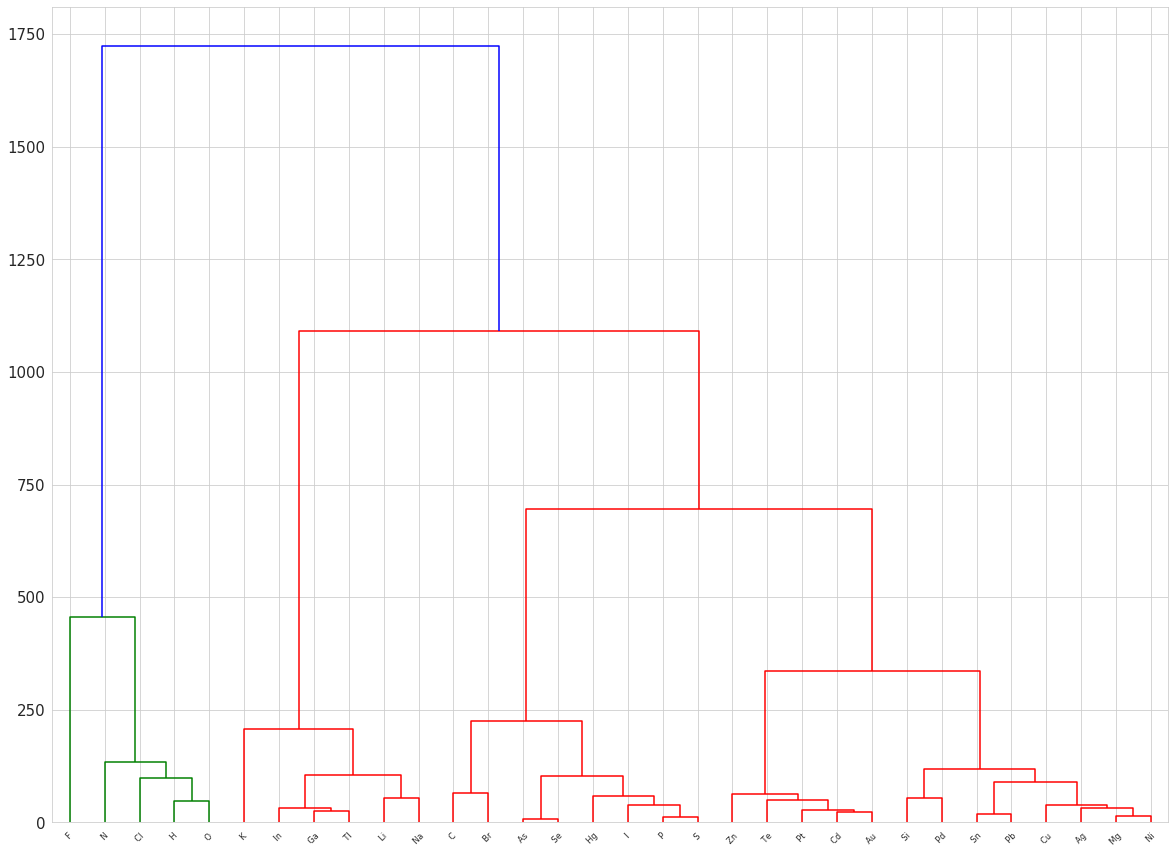

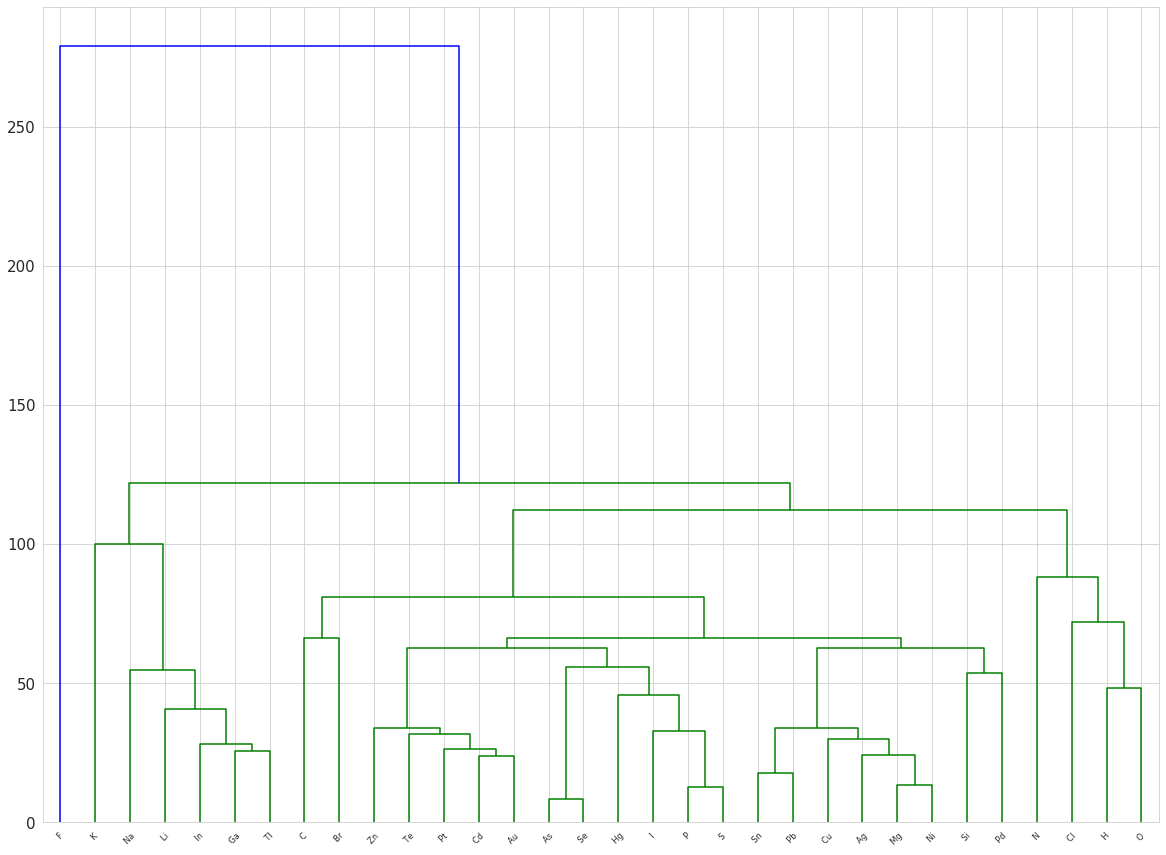

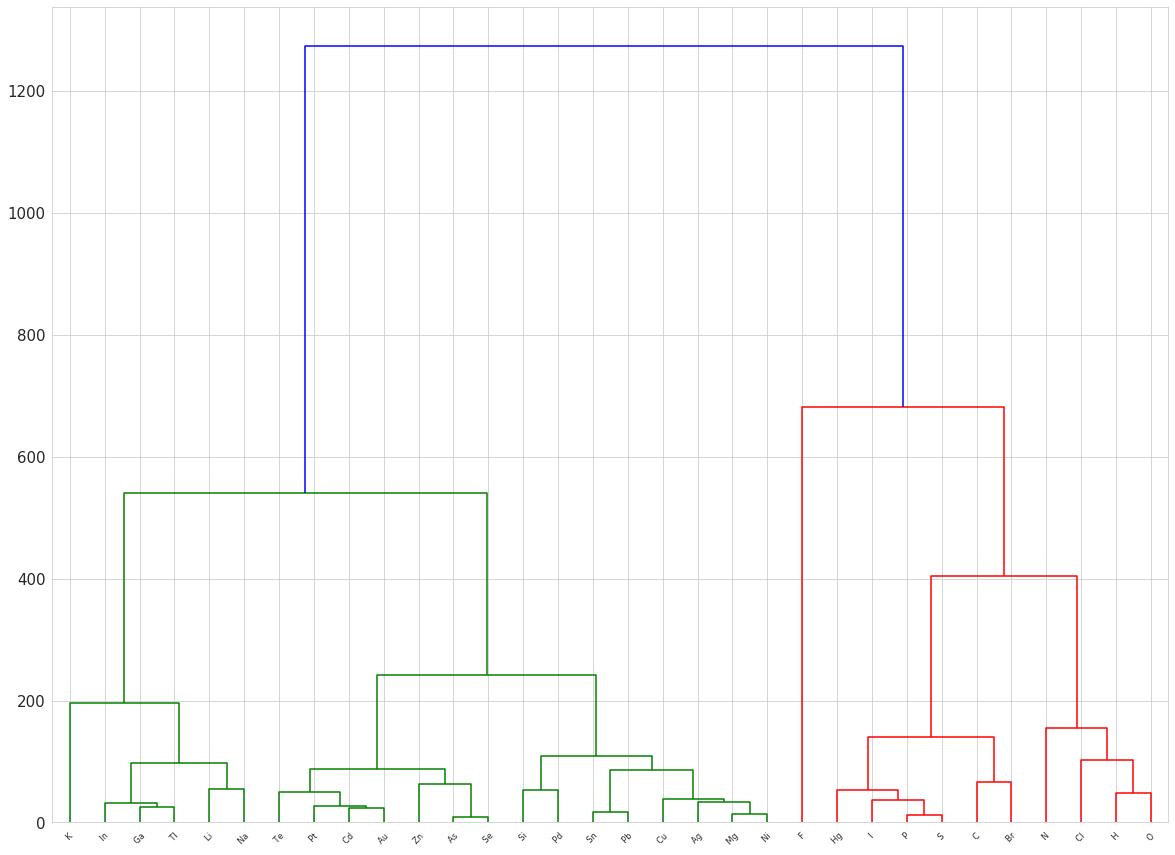

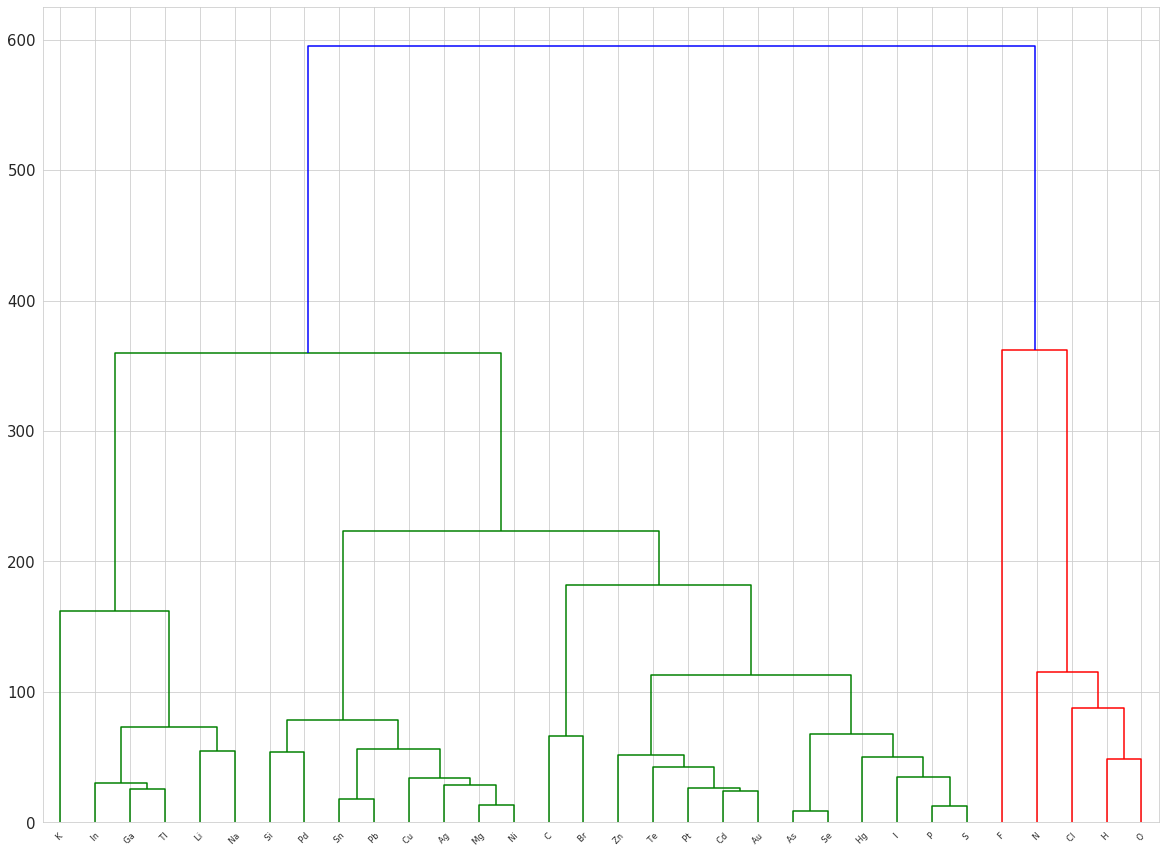

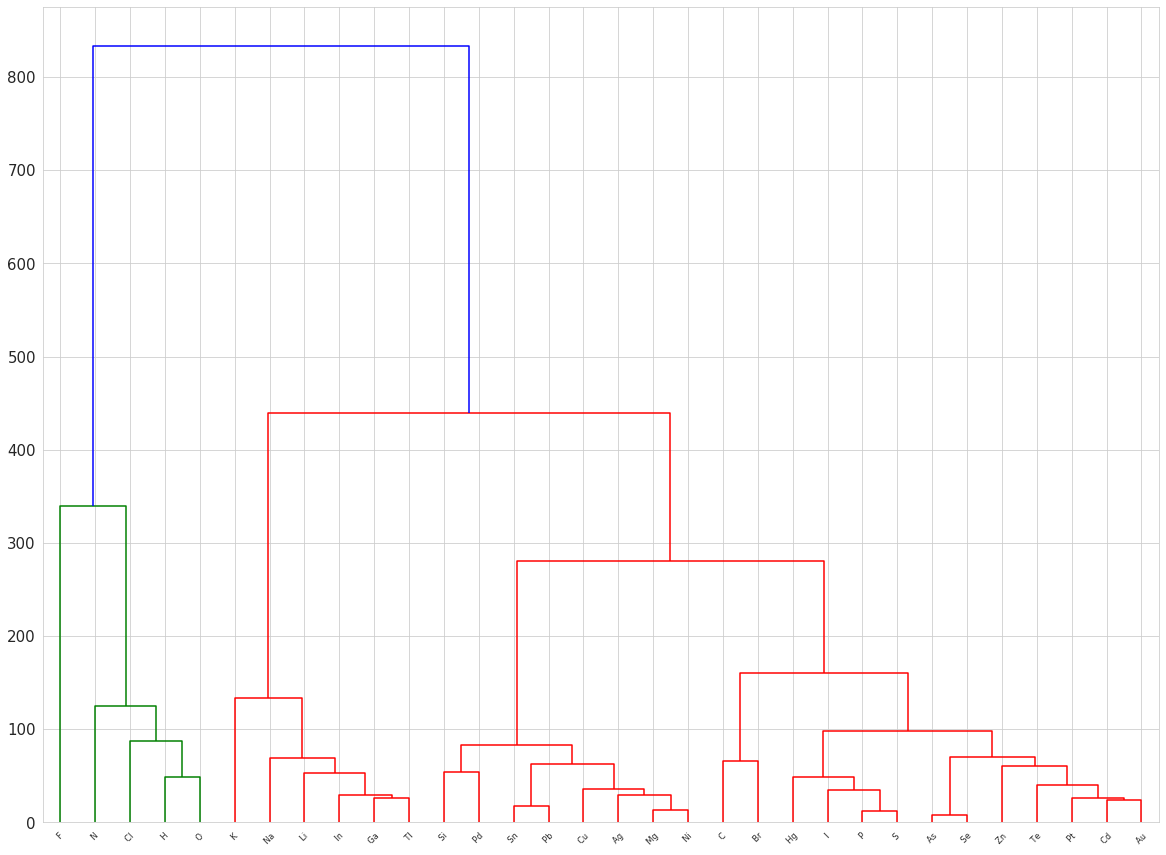

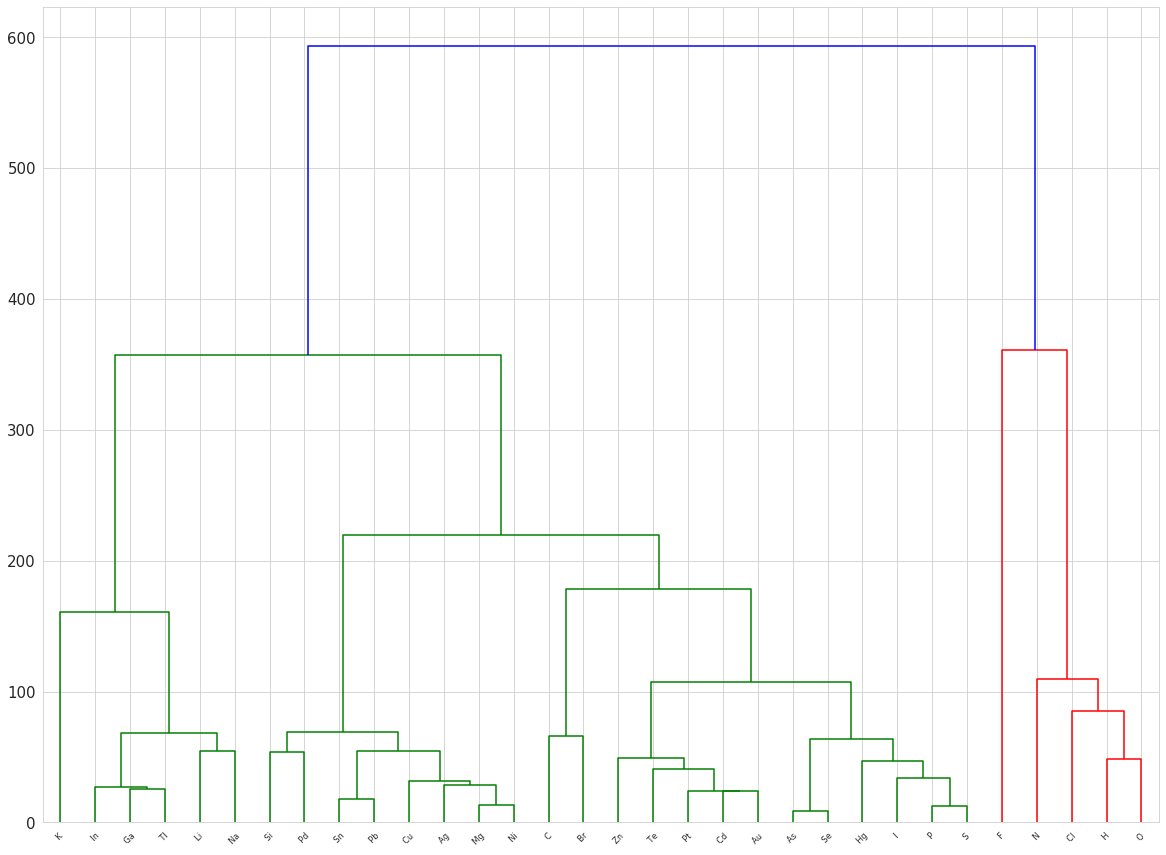

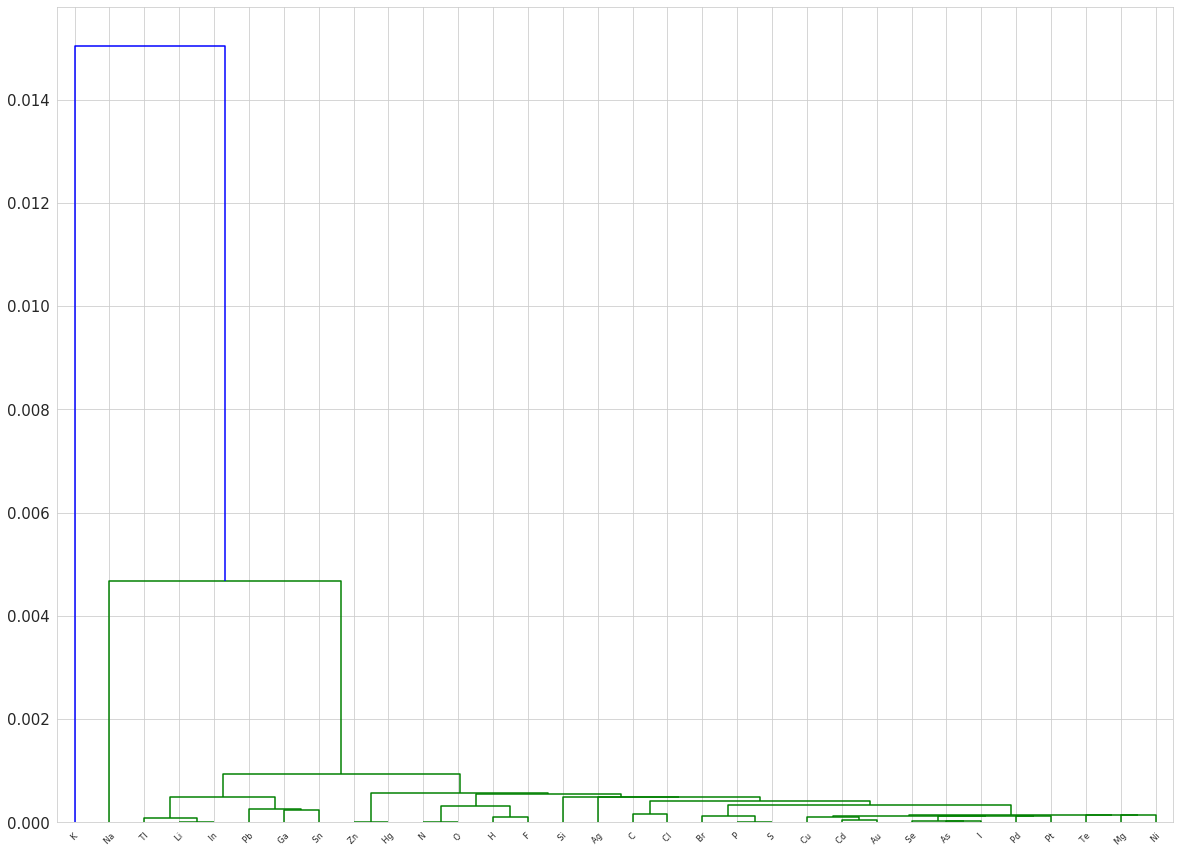

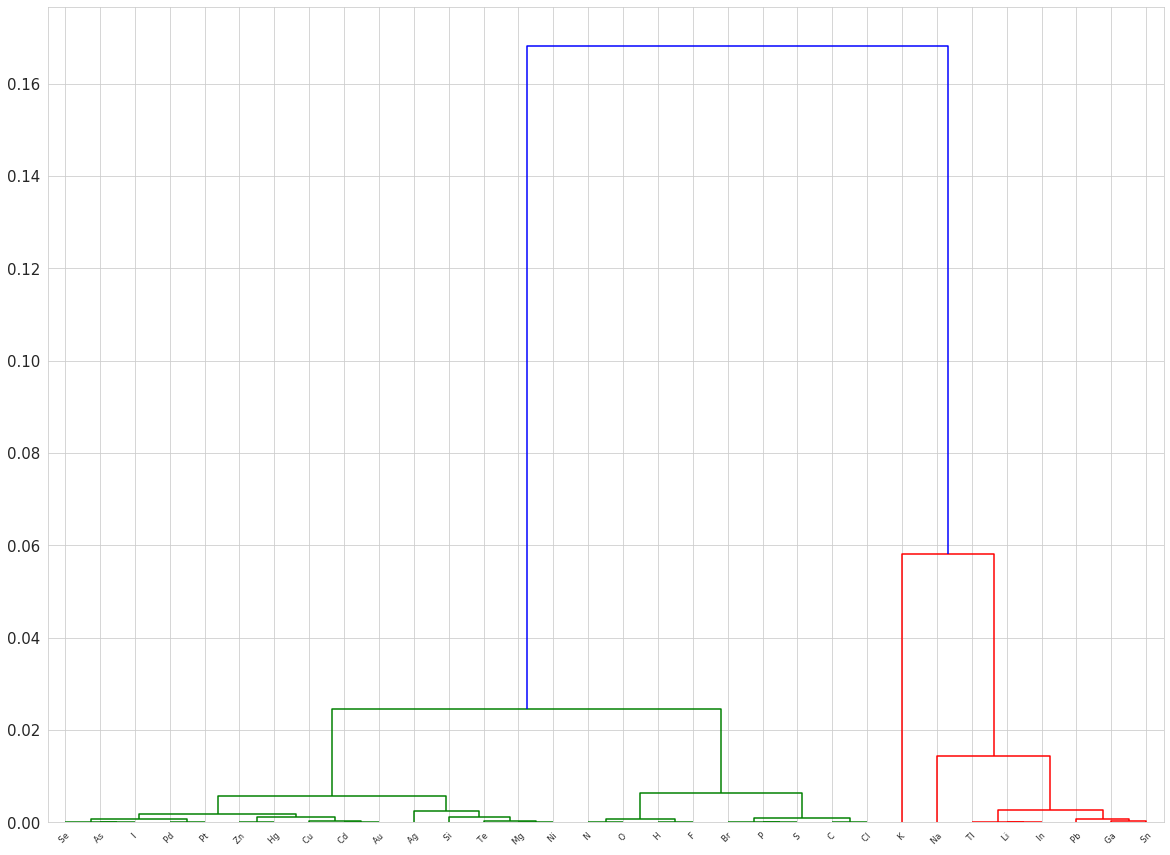

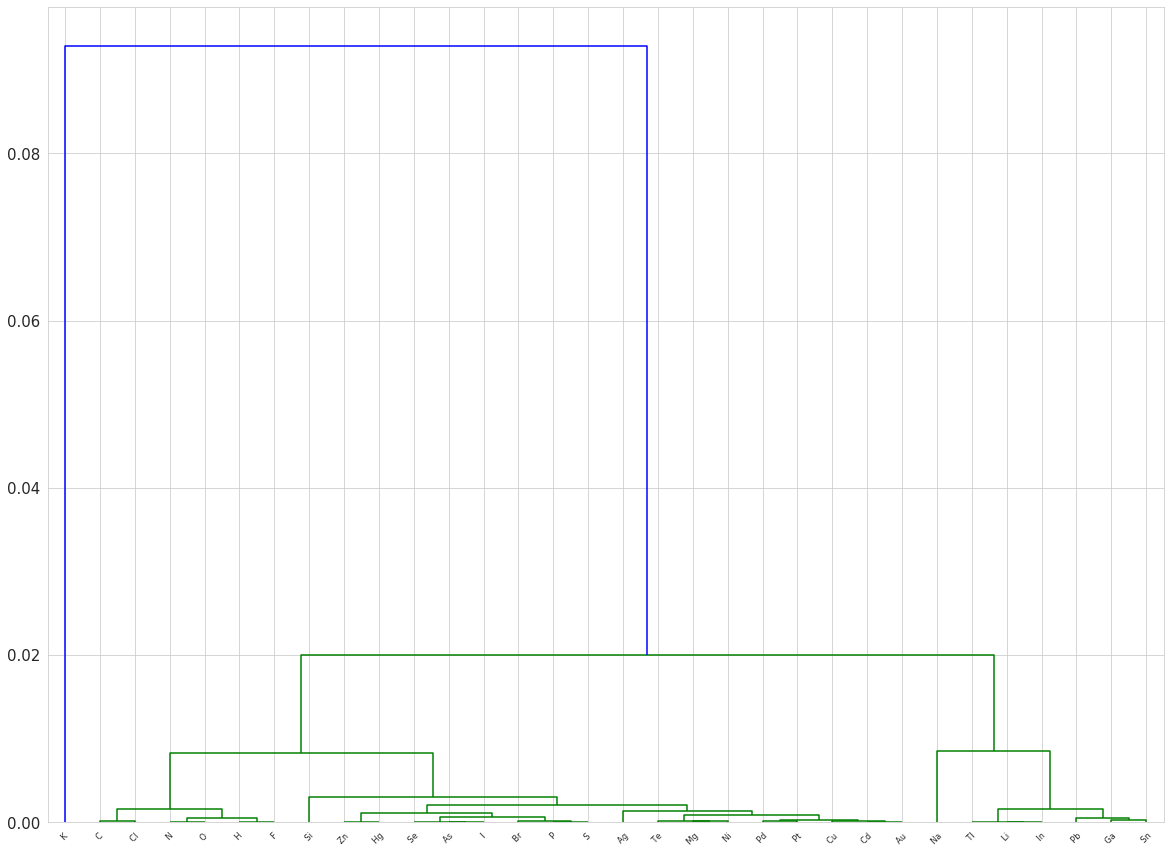

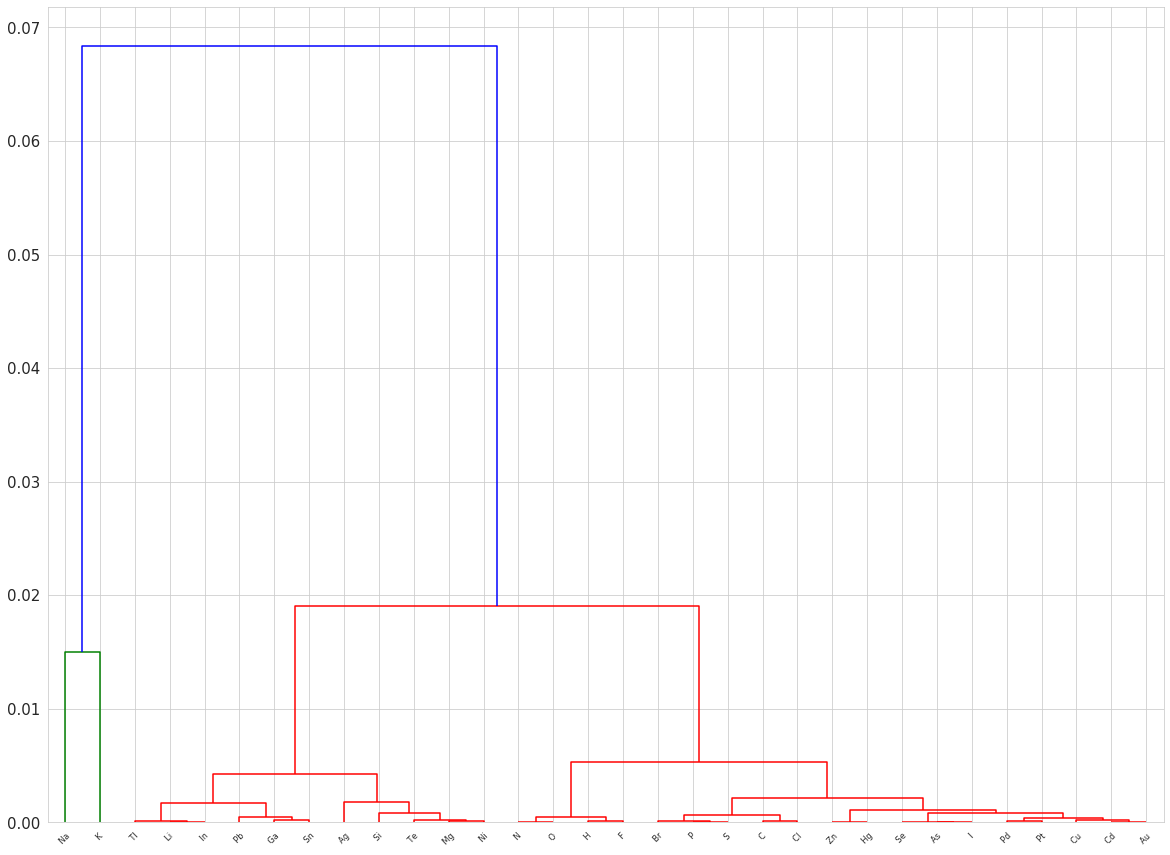

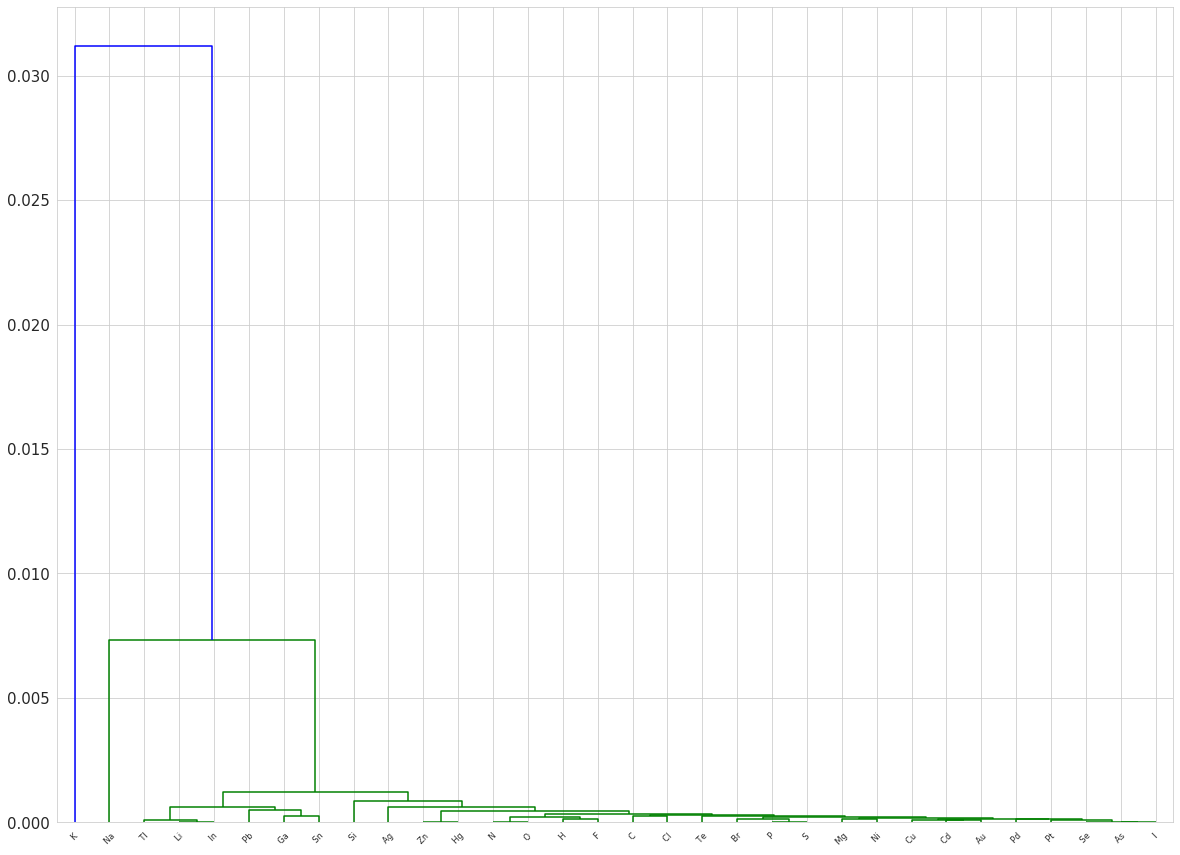

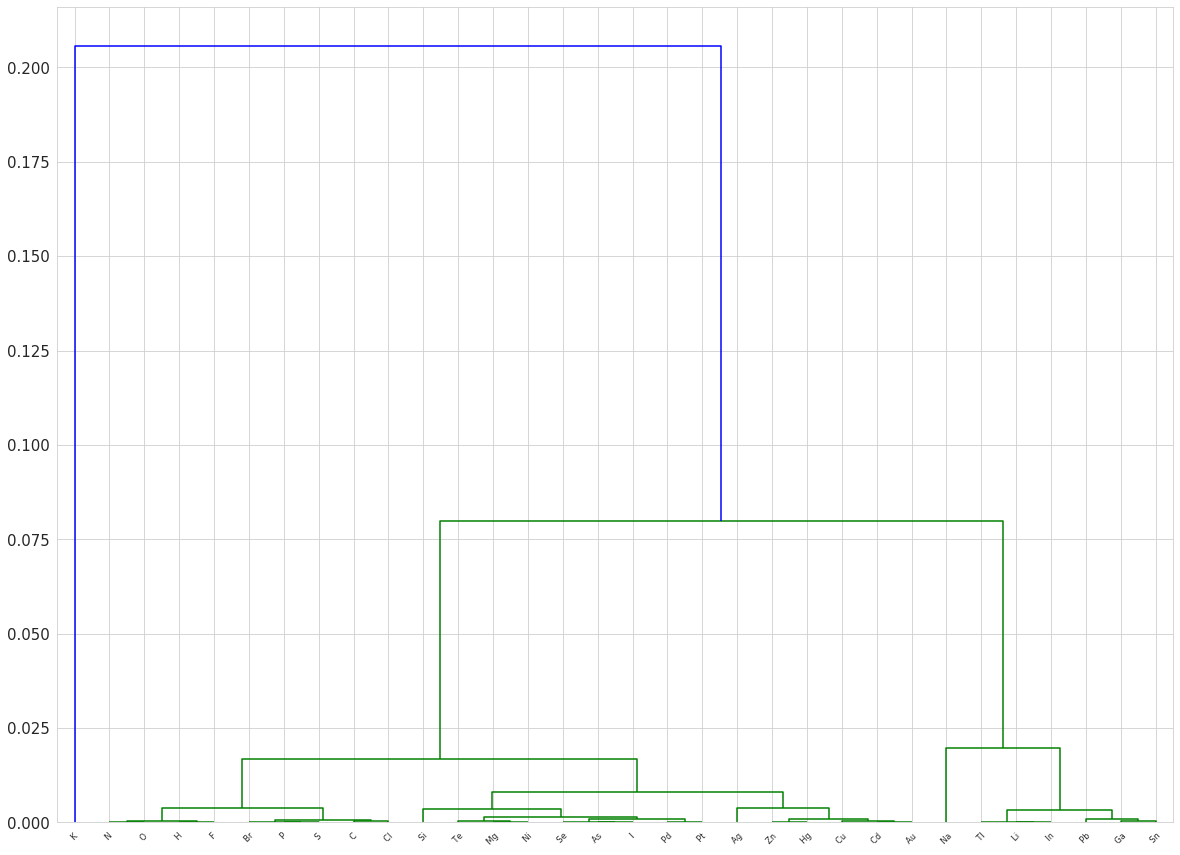

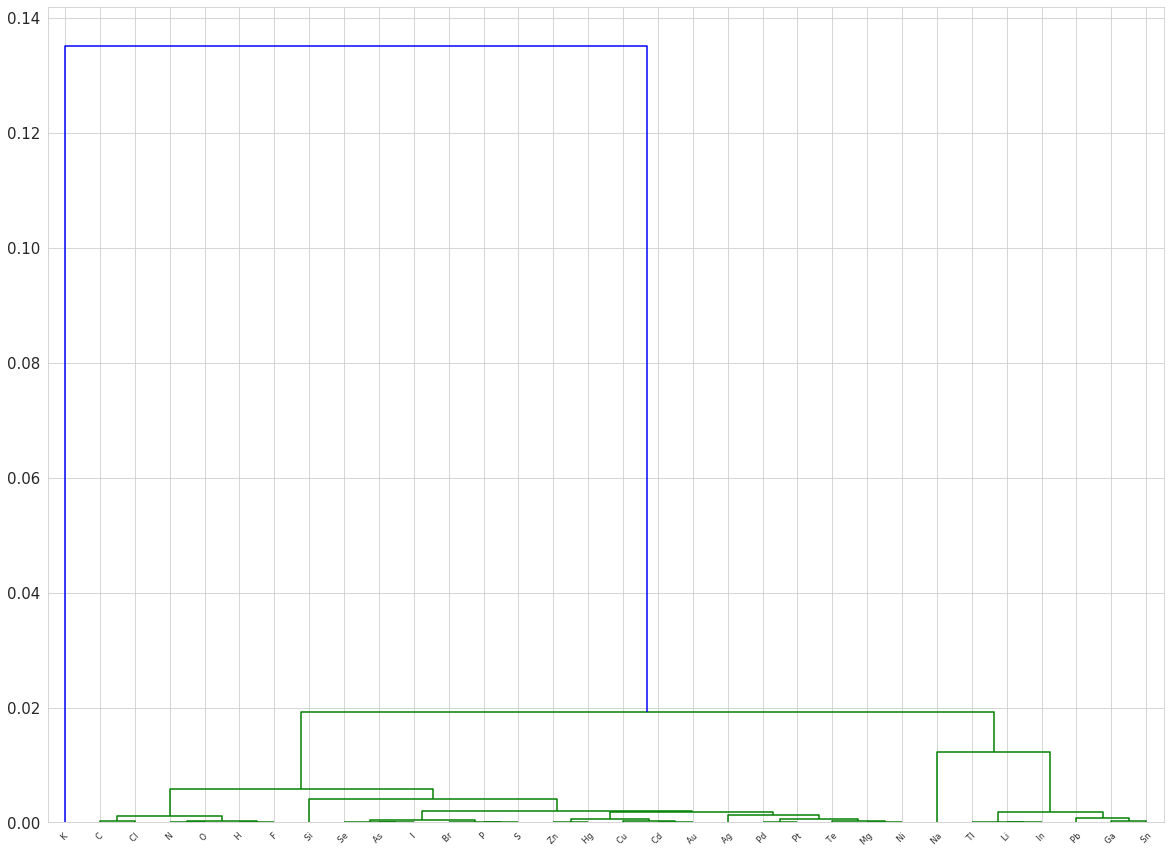

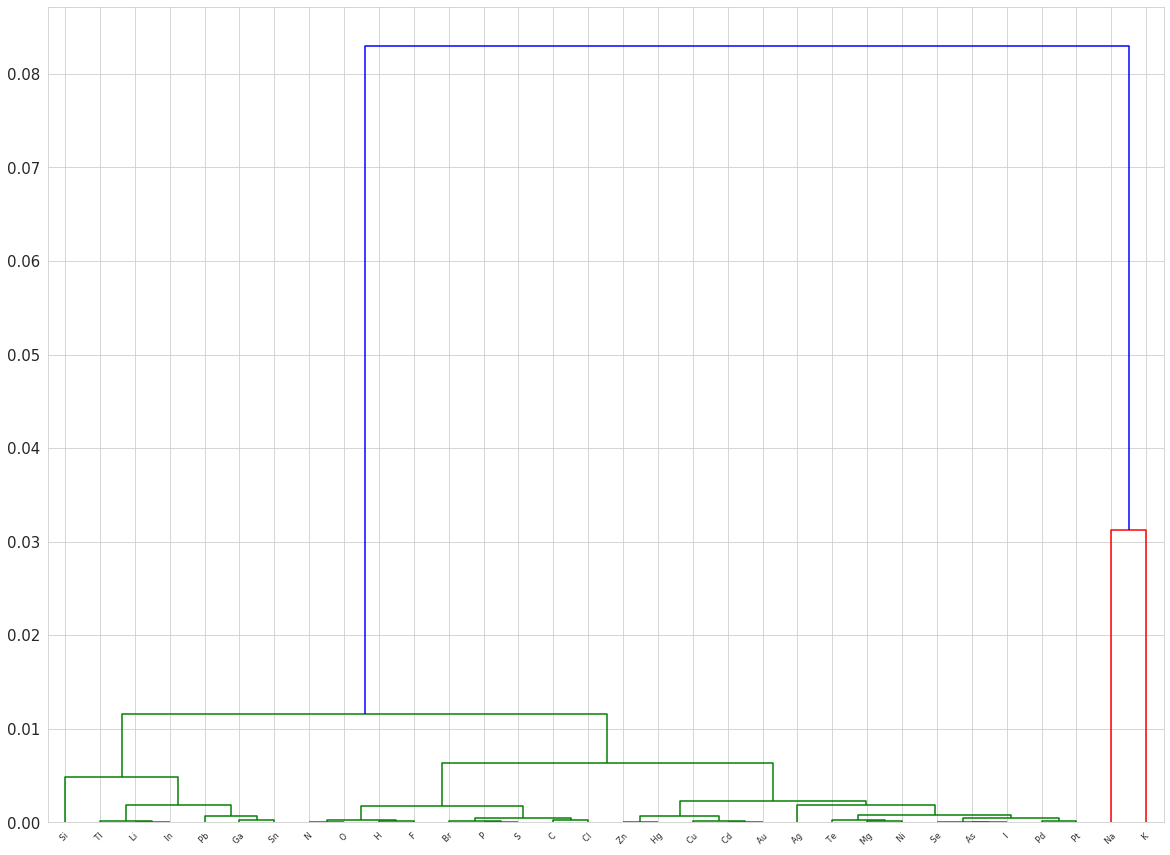

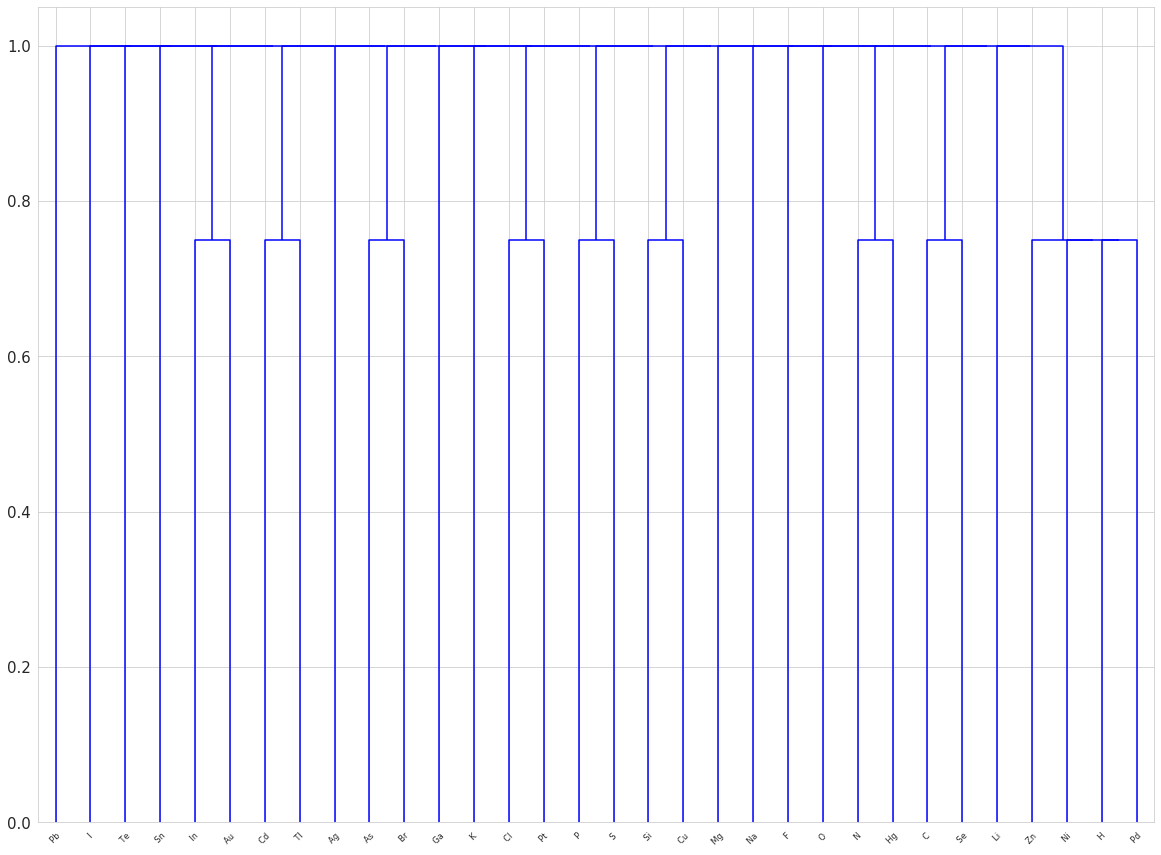

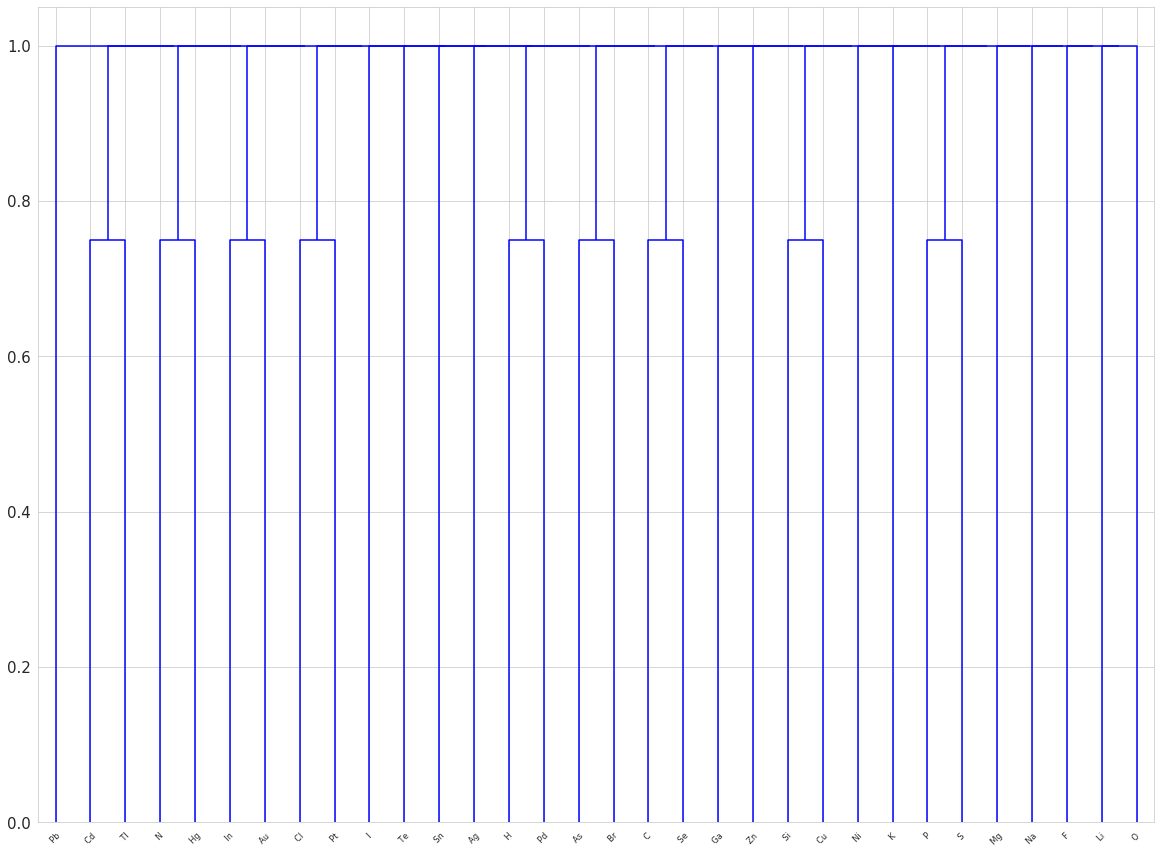

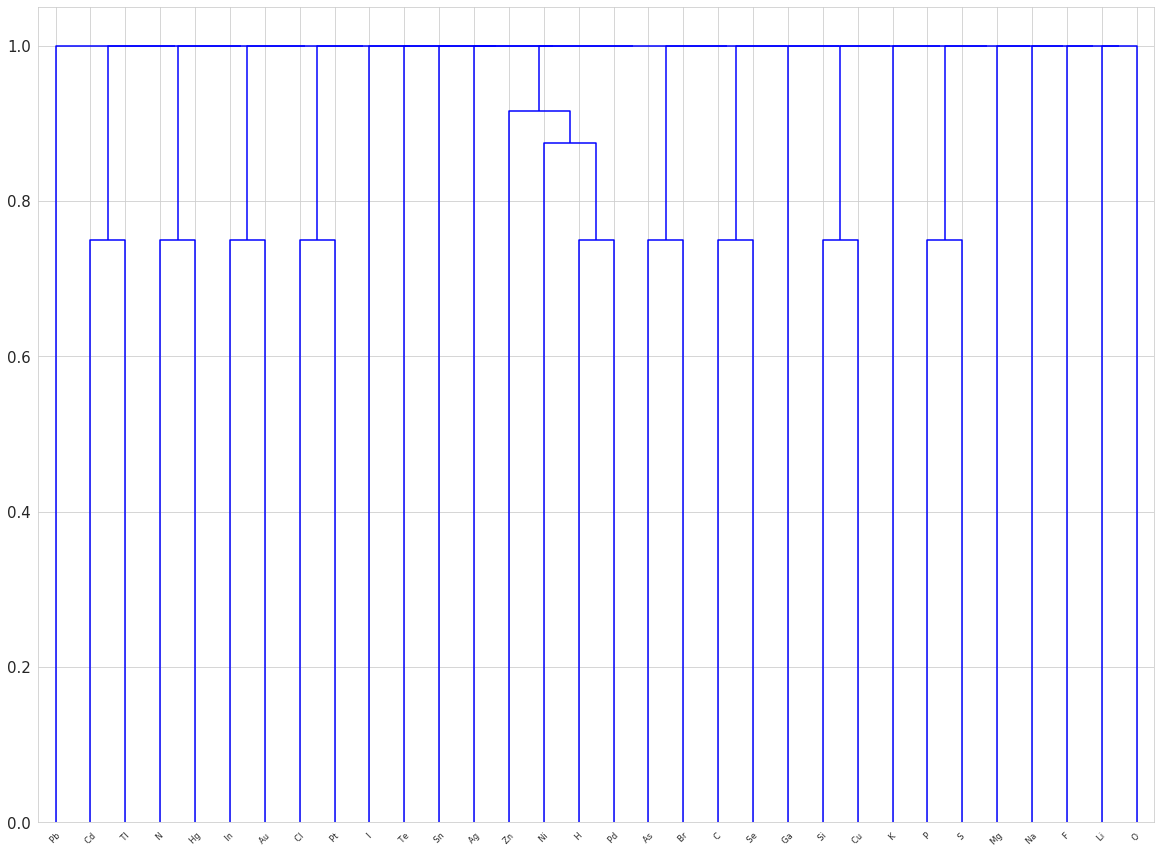

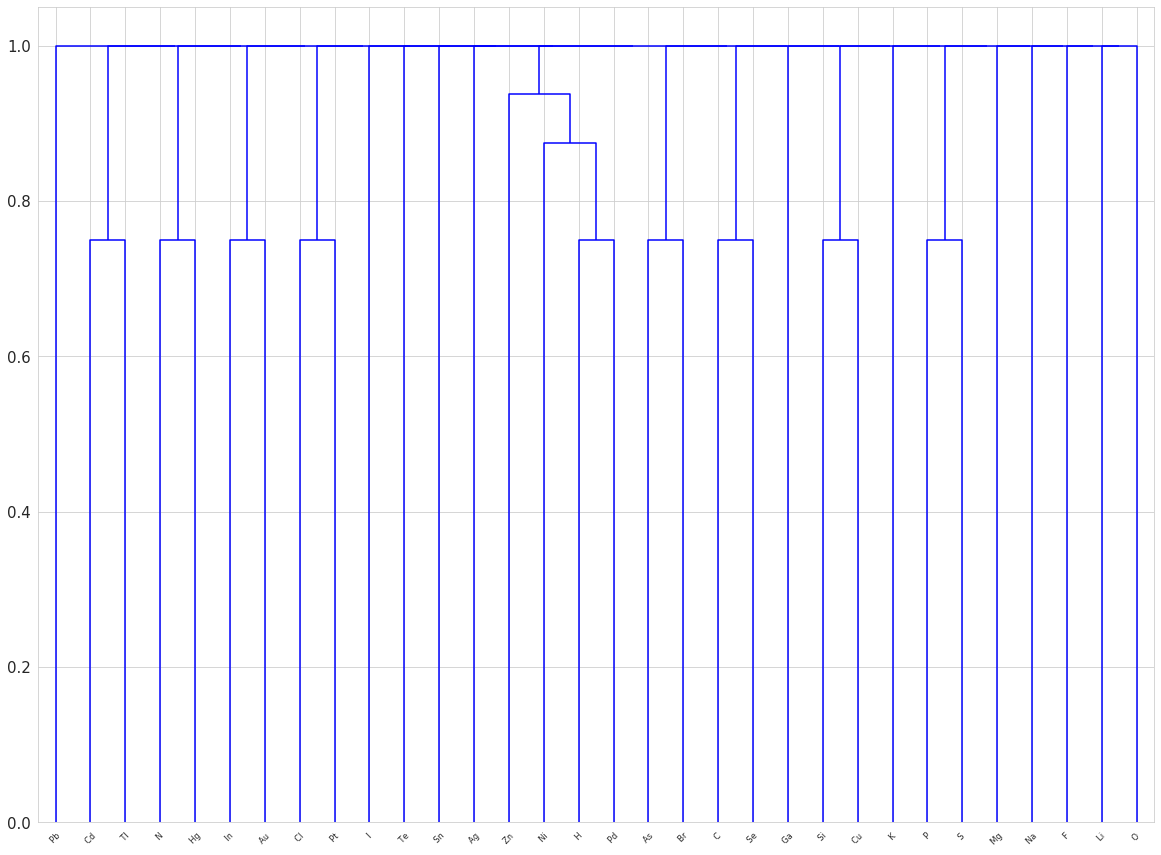

  ______________________________________________________________ {"icoord"
 |
 |______________________________________________________________ Clade
 |
 |______________________________________________________________ Clade
 |
 |______________________________________________________________ Clade
 |
 |______________________________________________________________ Clade
 |
 |______________________________________________________________ Clade
 |
 |______________________________________________________________ Clade
 |
 |______________________________________________________________ Clade
 |
 |______________________________________________________________ Clade
 |
 |______________________________________________________________ Clade
 |
 |______________________________________________________________ Clade
 |
 |______________________________________________________________ Clade
 |
 |______________________________________________________________ Clade
 |
 |________________________________

In [0]:
#!pip install scikit-bio
#!pip install biopython

from collections import defaultdict
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib.colors import rgb2hex, colorConverter
from scipy.cluster.hierarchy import set_link_color_palette
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
%pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = 20, 15
rcParams['axes.labelsize']='large' 
rcParams['font.size']=15
import seaborn as sns
sns.set_style("whitegrid")
from scipy.cluster import hierarchy
from skbio import TreeNode
from google.colab import files

#-------------------------------------------------------
# Consensus Tree 

from io import StringIO
from Bio import Phylo
from Bio.Phylo.Consensus import majority_consensus
from Bio.Phylo.Consensus import *
from itertools import permutations
import xml
from xml.dom.minidom import Document
import copy
import json
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

url='https://raw.githubusercontent.com/phibrainDK/tesis/master/Periodic%20Table'
dataset=pd.read_csv(url)
dataset_t=dataset.iloc[:, [1, 6, 7, 9, 10, 11]]

#the best comand for now

dataset_t=dataset_t.dropna()
data_labels=dataset_t.iloc[:, 0]
# print(data_labels)
data_values=dataset_t.iloc[:, [1, 2, 3, 4]]
list_features=[]
print(data_labels)
# print(data_values)
for aea in data_values:
    list_features.append(aea)
# print(list_features)
x=data_values.loc[:, list_features].values
# print(x)

# y=data_values.loc[:, ['elements']].values
x=StandardScaler().fit_transform(x)
# print("aeaaaaaaaaaaaa", x)
data_labels=data_labels.transpose()
pca=PCA(n_components=2)
PC=pca.fit_transform(x)
# print(PC)
# print(data_labels)
PData=pd.DataFrame(data=PC, columns=['PC1', 'PC2'])
print(PData)

# FinalDF=pd.concat([PData, data_labels], axis=1)
# print(FinalDF )
pca.explained_variance_ratio_
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente Principal 1', fontsize = 15)
ax.set_ylabel('Componente Principal 2', fontsize = 15)
ax.set_title('PCA para 2 componentes', fontsize = 20)
ax.grid()
plt.show()
# ax.show()
pca.explained_variance_ratio_


#-------------------------------------------------------------


list_metricas=['euclidean', 'cosine', 'correlation', 'hamming']
list_metodos=['ward', 'single', 'complete', 'average', 'weighted', 'centroid']
# ind=[1, 2, 3, 4]

#testear la cantidad de null types
# print(dataset_t.isnull().sum().sum())

trees=[]
# list_names=[]

def Find_all_dendrograms(idx, metrica, metodo):
    cur=dataset_t.iloc[:, idx]
    current_data_values=pdist(cur)
    if((metodo=='ward' or metodo == 'centroid') and metrica != 'euclidean'):
        return
    den_cur=linkage(cur, metric=metrica, method=metodo)
    cur_tree=dendrogram(den_cur, labels=list(data_labels))
    matplotlib.pyplot.gcf()
    name_fig=""
    # name_tree=""
    name_fig+=metrica+"_"+metodo+".png"
    # name_tree+=metrica+"_"+metodo+".xml"
    plt.savefig(name_fig)
    # plt.save(nametree)
    plt.show()
    files.download(name_fig)
    new_tree=json.dumps(cur_tree)
    # print(new_tree)
    act_tree=Phylo.read(StringIO(new_tree), "newick")
    trees.append(act_tree)
    # trees.append(Phylo.read(StringIO(new_tree), "newick")

list_indices=[1, 2, 3, 4]

for i in range(len(list_metricas)):
    for j in range(len(list_metodos)):        
       Find_all_dendrograms(list_indices, list_metricas[i], list_metodos[j])



strict_tree = strict_consensus(trees)
majority_tree = majority_consensus(trees, 0.5)
# adam_tree = adam_consensus(trees)
Phylo.draw_ascii(strict_tree)
Phylo.draw_ascii(majority_tree)
# Phylo.draw_ascii(adam_tree)

def random_hclust(m=10, n=10):
    X = np.zeros((m, n))
    for i in range(n):
        X[:, i] = np.random.normal(0, 1, m)
    return linkage(X)

def cut_tree(hclust, id_list, level, upper=True):
    t = TreeNode.from_linkage_matrix(hclust, id_list)
    to_delete = set()
    for tip in t.tips():
        distance = tip.length

        ancestors = tip.ancestors()[::-1]
        current = ancestors.pop()
        while ancestors and distance <= level and not current.is_root():
            distance += current.length
            current = ancestors.pop()

        if distance > level:
            to_delete.update({c for c in current.children})

    t.remove_deleted(lambda n: n in to_delete)
    return t

def main():
    m = 10
    n = 10
    id_list = [str(i) for i in range(m)]
    # hclust = X=dendrogram(a, labels=list(data_labels))
    #files.download('hclust.tree')

if __name__ == "__main__":
    main()













# Tuning 
#-------------------------------------------------------------------------------------------------------

class Clusters(dict):
    def _repr_html_(self):
        html = '<table style="border: 0;">'
        for c in self:
            hx = rgb2hex(colorConverter.to_rgb(c))
            html += '<tr style="border: 0;">' \
            '<td style="background-color: {0}; ' \
                       'border: 0;">' \
            '<code style="background-color: {0};">'.format(hx)
            html += c + '</code></td>'
            html += '<td style="border: 0"><code>' 
            html += repr(self[c]) + '</code>'
            html += '</td></tr>'

        html += '</table>'

        return html
def get_cluster_classes(den, label='ivl'):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))
    
    cluster_classes = Clusters()
    for c, l in cluster_idxs.items():
        i_l = [den[label][i] for i in l]
        cluster_classes[c] = i_l
    
    return cluster_classes

def get_clust_graph(df, numclust, transpose=False, dataname=None, save=False, xticksize=8):
    if transpose==True:
        aml=df.transpose()
        xl="x-axis"
    else:
        aml=df
        xl="y-axis"
    data_dist = pdist(aml.transpose()) # computing the distance
    data_link = linkage(data_dist,  metric='correlation', method='complete')#method="complete") # computing the linkage
    B=dendrogram(data_link,labels=list(aml.columns),p=numclust, truncate_mode="lastp",get_leaves=True, count_sort='ascending', show_contracted=True)
    #myInd = [i for i, c in zip(B['ivl'], B['color_list']) if c=='g']
    get_cluster_classes(B)
    ax=plt.gca()
    ax.tick_params(axis='x', which='major', labelsize=xticksize)
    ax.tick_params(axis='y', which='major', labelsize=15)
    plt.xlabel(xl)
    #plt.set_size_inches(18.5, 10.5)
    plt.ylabel('Distance')
    plt.suptitle(xl+" clustering for "+dataname, fontweight='bold', fontsize=16);
    if save:
        plt.savefig(str(df.index.name)+str(numclust)+"tr_"+str(transpose)+"dn_"+str(dataname)+save+'.png')
    else:
        print("Not saving")
    return get_cluster_classes(B)

# get_clust_graph(data_values, 32, transpose=True, dataname='Dendrograma para la base de datos X', save="ww2", xticksize=9)
#------------------------------------------------------------------------------------------------------------------------------

#here code for consensus tree
















In [0]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = 'REPLACE_WITH_YOUR_FILE_ID'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))